In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import math

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [22]:
cpu_data = pd.read_csv("../../model_data/cpuProductData.csv")
gpu_data = pd.read_csv("../../model_data/gpuProductData.csv")
gpuModels = pd.read_csv("../../model_data/gpuModels.csv")
cpuModels = pd.read_csv("../../model_data/cpuModels.csv")
brands = pd.read_csv("../../model_data/brands.csv")

In [10]:
print("hello")
gpuModels.shape

(44, 2)

In [11]:
cpuModels.shape

(178, 1)

In [12]:
brands.shape

(29, 2)

In [126]:
# brands = brands.drop(columns = ['Unnamed: 0'])


In [92]:
brands

,brand
0,ASUS TUF GAMING X3
1,ASUS STRIX
2,ASUS PHOENIX
3,NVIDIA QUADRO
4,ASUS TUF
5,ASUS TUF 3
6,INTEL
7,MSI
8,ASUS ROG
9,GIGABYTE AORUS


In [13]:
models = gpuModels.append(cpuModels)
models = models.drop(columns = ['id'])
label_encoder = LabelEncoder()
models['model_code'] = label_encoder.fit_transform(models['model'])
enc_models= pd.get_dummies(models.model_code, prefix='m')
models = pd.concat([models, enc_models], axis=1)
models = models.sort_values(by="model_code")
models

,model,model_code,m_0,m_1,m_2,m_3,m_4,m_5,m_6,m_7,...,m_209,m_210,m_211,m_212,m_213,m_214,m_215,m_216,m_217,m_218
57,A10 6700,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,A10 6700T,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,A10 6790K,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,A10 6800K,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,A10 7700K,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,Ryzen Threadripper PRO 3995WX,214,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
43,VII,215,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
106,Xeon D,216,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
104,Xeon E,217,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [94]:
label_encoder = LabelEncoder()
brands['brand_code'] = label_encoder.fit_transform(brands['brand'])
enc_brands = pd.get_dummies(brands.brand_code, prefix='b')
brands = pd.concat([brands, enc_brands], axis=1)
brands = brands.sort_values(by="brand_code")
brands.tail()

,brand,brand_code,b_0,b_1,b_2,b_3,b_4,b_5,b_6,b_7,...,b_19,b_20,b_21,b_22,b_23,b_24,b_25,b_26,b_27,b_28
3,NVIDIA QUADRO,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16,PALIT,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21,ROG STRIX,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18,SAPPHIRE,27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13,SAPPHIRE NITRO+,28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
availability = pd.DataFrame(["Out of stock", "In stock"])
availability = availability.rename(columns={0: "availability"})
availability['availability_code'] = label_encoder.fit_transform(availability['availability'])
enc_availability = pd.get_dummies(availability.availability_code, prefix='a')
availability = pd.concat([availability, enc_availability], axis=1)
availability.tail()

,availability,availability_code,a_0,a_1
0,Out of stock,1,0,1
1,In stock,0,1,0


In [16]:
type_ = pd.DataFrame(["cpu", "gpu"])
type_ = type_.rename(columns={0: "type"})
type_['type_code'] = label_encoder.fit_transform(type_['type'])
enc_type = pd.get_dummies(type_.type_code, prefix='t')
type_ = pd.concat([type_, enc_type], axis=1)
type_.tail()

,type,type_code,t_0,t_1
0,cpu,0,1,0
1,gpu,1,0,1


In [17]:
models.columns.to_list()[0]

'model'

In [46]:
eg_data = {
    "brand":"INTEL",
    "model":"hhgjgbbuy Core i3 10100F jgjhgiuv",
    "availability":"Out of stock",
    "price":50000,
    "type":"cpu"
}

In [99]:
def getCode(data, code_pd, name):
#     print(data, code_pd, name)
    for dt in code_pd.itertuples():
        if data.upper().find(str(dt[1].upper())) != -1:
            return code_pd[code_pd[name] == str(dt[1])]

In [100]:
# eg_data["model"]

In [69]:
# getCode(eg_data["model"], models, "model")

In [71]:
# print(getCode(eg_data["model"], models, "model"))

In [106]:
# print(getCode(eg_data["model"], models, "model").drop(columns=["model", "model_code"]))
print(getCode(eg_data["brand"], brands, "brand").drop(columns=["brand", "brand_code"]))
# print(type_[type_["type"] == eg_data["type"]].drop(columns=["type", "type_code"]))
# print(availability[availability["availability"] == eg_data["availability"]].drop(columns=["availability", "availability_code"]))

   b_0  b_1  b_2  b_3  b_4  b_5  b_6  b_7  b_8  b_9  ...  b_19  b_20  b_21  \
6    0    0    0    0    0    0    0    0    0    0  ...     0     0     0   

   b_22  b_23  b_24  b_25  b_26  b_27  b_28  
6     1     0     0     0     0     0     0  

[1 rows x 29 columns]


In [110]:
for dt in data.itertuples():
    print(data.at[dt.Index, 'brand'])

ASUS ROG POSEIDON PLATINUM
ASUS ROG STRIX
MSI
MSI
MSI
MSI
SAPPHIRE
GIGABYTE
SAPPHIRE
MSI
MSI
GIGABYTE
MSI
MSI
ASUS ROG STRIX
MSI
MSI
GIGABYTE
MSI
MSI
MSI
ASUS
MSI
GIGABYTE
MSI
SAPPHIRE
MSI
MSI
MSI
MSI
ASUS ROG STRIX
ASUS
SAPPHIRE
MSI
MSI
MSI
MSI
MSI
MSI
MSI
MSI
MSI
ASUS ROG STRIX
MSI
MSI
SAPPHIRE
MSI
MSI
MSI
ASUS ROG STRIX
MSI
MSI
MSI
ASUS ROG STRIX
MSI
MSI
MSI
ASUS STRIX
MSI
MSI
MSI
MSI
ASUS ROG STRIX
MSI
ASUS ROG STRIX
MSI
MSI
MSI
MSI
MSI
MSI
ASUS ROG STRIX
MSI
MSI
ASUS ROG STRIX ADVANCED
ASUS ROG STRIX
ASUS
MSI
MSI
MSI
MSI
ASUS ROG STRIX
MSI
MSI
ASUS
ASUS ROG STRIX
MSI
MSI
ASUS STRIX
ASUS ROG STRIX
MSI
ASUS ROG STRIX
ASUS
ASUS
ASUS ROG STRIX
MSI
ASUS
ASUS
MSI
ASUS ROG STRIX
ASUS
ASUS ROG STRIX
ASUS
MSI
MSI
ASUS
ASUS PHOENIX
ASUS ROG STRIX
ASUS
ASUS PHOENIX
MSI
MSI
MSI
MSI
ASUS ROG STRIX
MSI
MSI
ASUS ROG STRIX ADVANCED
ASUS ROG STRIX
ASUS
MSI
MSI
MSI
MSI
ASUS ROG STRIX
MSI
MSI
ASUS
ASUS ROG STRIX
ASUS ROG STRIX
MSI
MSI
ASUS STRIX
ASUS ROG STRIX
MSI
MSI
ASUS
ASUS
ASUS
ASUS ROG STRIX
M

In [122]:
data

,brand,model,price,availability,date,type
0,ASUS ROG POSEIDON PLATINUM,GTX 1080 TI 11GB,16799,In Stock,20171231,gpu
1,ASUS ROG STRIX,GEFORCE GTX 1080 TI 11GB,14129,In Stock,20171231,gpu
2,MSI,GEFORCE GTX 1080 TI GAMING X TRIO,13999,In Stock,20171231,gpu
3,MSI,RADEON RX VEGA 64 8GB,13799,Out of Stock,20171231,gpu
4,MSI,GEFORCE GTX 1080 TI GAMING X OC,13799,Out of Stock,20171231,gpu
...,...,...,...,...,...,...
7368,AMD,RYZEN 3 3300X,3299,Out of Stock,20210702,cpu
7369,AMD,RYZEN 3 3100,2179,Out of Stock,20210702,cpu
7370,INTEL,CORE I3 9100,1849,Out of Stock,20210702,cpu
7371,AMD,ATHLON 3000G DUAL CORE,1499,Out of Stock,20210702,cpu


In [141]:
def encode_data(brand, model, availability_, price, type_d, timestamp):
    d1 = getCode(model, models, "model").drop(columns=["model", "model_code"])
    d2 = getCode(brand, brands, "brand").drop(columns=["brand", "brand_code"])
    d3 = type_[type_["type"] == type_d].drop(columns=["type", "type_code"])
    d4 = availability[availability["availability"].str.upper() == availability_.upper()].drop(columns=["availability", "availability_code"])
    data_ = pd.DataFrame([{"price":price}])    
    d1.reset_index(drop=True, inplace=True)
    d2.reset_index(drop=True, inplace=True)
    d3.reset_index(drop=True, inplace=True)
    d4.reset_index(drop=True, inplace=True)
    data_2 = pd.concat([data_,d1, d2, d3, d4], axis=1)
    data_ = pd.concat([data_,d1, d2, d3, d4], axis=1)
    data_1 = data_
#   data_1 = data_.drop(columns=["price"])
    
    year, month, quarter, week, day_year, day_month, day_week = split_date(timestamp)
#     print(year, month, quarter, week, day_year, day_month, day_week)
    data_1['year'], data_2['year'] = year, year
    data_1['month'], data_2['month'] = month, month
    data_1['quarter'], data_2['quarter'] = quarter, quarter
    data_1['week'], data_2['week'] = week, week
    data_1['day_year'], data_2['day_year'] = day_year, day_year
    data_1['day_month'], data_2['day_month'] = day_month, day_month
    data_1['day_week'], data_2['day_week'] = day_week, day_week
    
    
    return data_1, data_2

In [124]:
price_model_data = pd.DataFrame()
avail_model_data = pd.DataFrame()

20171231

In [130]:
def encode_training_data(data):
    global price_model_data
    for dt in data.itertuples():
        price_pred_data, avail_pred_data = encode_data(data.at[dt.Index, 'brand'],data.at[dt.Index, 'model'] , data.at[dt.Index, 'availability'], data.at[dt.Index, 'price'], data.at[dt.Index, 'type'], data.at[dt.Index, 'date'].astype("str"))
        price_model_data = price_model_data.append(price_pred_data)
        avail_model_data = avail_model_data.append(avail_pred_data)

2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 52 364 31 7
2017 12 4 

AttributeError: 'float' object has no attribute 'upper'

In [121]:
def split_date(date):    
    year = int(date[:4])
    month = int(date[4:6])
    day_month = int(date[6:8])
    week = datetime.date(year, month, day_month).isocalendar()[1]
    day_week = datetime.date(year, month, day_month).isocalendar()[2]
    day_year = day_week * week
    quarter = math.ceil(float(month)/3)
    return year, month, quarter, week, day_year, day_month, day_week


data = price_model_data.copy()

In [201]:
data = data.dropna()

In [228]:
avail_model_data = avail_model_data.dropna()
avail_model_data.to_csv('avail_prediction.csv')

In [202]:
data_label = data.pop('price')

In [203]:
data_label

0    16799.0
0    14129.0
0    13999.0
0    13799.0
0    13799.0
      ...   
0     2999.0
0     2899.0
0     2399.0
0     1849.0
0     1499.0
Name: price, Length: 6984, dtype: float64

In [204]:
np.where(pd.isnull(data))

(array([], dtype=int64), array([], dtype=int64))

In [205]:
train_features, test_features, train_labels, test_labels = train_test_split(data, data_label)

In [206]:
train_features.head()

,m_0,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,...,t_1,a_0,a_1,year,month,quarter,week,day_year,day_month,day_week
0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,2018,11,4,47,188,22,4
0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,2018,11,4,45,45,5,1
0,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,2019,1,1,4,24,26,6
0,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,2018,5,2,18,90,4,5
0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,1.0,2019,10,4,42,294,20,7


In [207]:
train_labels.head()

0     3349.0
0     5699.0
0     3249.0
0      629.0
0    11999.0
Name: price, dtype: float64

In [208]:
train_labels.head()

0     3349.0
0     5699.0
0     3249.0
0      629.0
0    11999.0
Name: price, dtype: float64

In [209]:
input_data = np.array(train_features)
output_label = np.array(train_labels)

test_data = np.array(test_features)
test_output = np.array(test_labels)

print(output_label.shape)
print(test_output.shape)

(5238,)
(1746,)


In [210]:
output_label.shape

(5238,)

In [211]:
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

y_train=np.reshape(train_labels, (-1,1))
y_val=np.reshape(test_labels, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(input_data))
xtrain_scale=scaler_x.transform(input_data)

print(scaler_x.fit(test_data))
xval_scale=scaler_x.transform(test_data)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [212]:
ytrain_scale[0]

array([0.0293655])

In [213]:
model = keras.Sequential([
      layers.Dense(len(xtrain_scale[0]) + 1, input_dim=len(xtrain_scale[0]), kernel_initializer='normal', activation='relu'),
      layers.Dense(399, activation='relu'),
      layers.Dense(399, activation='relu'),
      layers.Dense(1,  activation='relu')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 260)               67600     
_________________________________________________________________
dense_5 (Dense)              (None, 399)               104139    
_________________________________________________________________
dense_6 (Dense)              (None, 399)               159600    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 400       
Total params: 331,739
Trainable params: 331,739
Non-trainable params: 0
_________________________________________________________________


In [214]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=1000, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0723 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0442
Epoch 2/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0288 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0217
Epoch 3/1000
28/28 [==============================] - 0s 4ms/step - loss: 7.1477e-04 - mse: 7.1477e-04 - mae: 0.0186 - val_loss: 4.9752e-04 - val_mse: 4.9752e-04 - val_mae: 0.0153
Epoch 4/1000
28/28 [==============================] - 0s 4ms/step - loss: 4.1756e-04 - mse: 4.1756e-04 - mae: 0.0141 - val_loss: 4.8430e-04 - val_mse: 4.8430e-04 - val_mae: 0.0146
Epoch 5/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.4559e-04 - mse: 3.4559e-04 - mae: 0.0124 - val_loss: 4.2552e-04 - val_mse: 4.2552e-04 - val_mae: 0.0131
Epoch 6/1000
28/28 [==============================] - 0s 4ms/step - loss: 3.4248e-04 - mse: 3.4248e-04 - mae: 0.0122 - val_loss: 4.3

In [215]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
995,0.000132,0.000132,0.005243,0.000414,0.000414,0.010279,995
996,0.000132,0.000132,0.005275,0.000407,0.000407,0.010381,996
997,0.000132,0.000132,0.005352,0.000394,0.000394,0.010092,997
998,0.000136,0.000136,0.005474,0.000409,0.000409,0.010353,998
999,0.000134,0.000134,0.005367,0.000412,0.000412,0.010518,999


## Prediction on the testset

In [216]:
predictions = model.predict(xval_scale)
predictions = scaler_y.inverse_transform(predictions)
print(predictions)

[[13512.216 ]
 [ 7799.3564]
 [14445.633 ]
 ...
 [28826.107 ]
 [ 1739.1991]
 [ 1258.6174]]


In [217]:
metrics = model.evaluate(xval_scale, yval_scale)

55/55 [==============================] - 0s 2ms/step - loss: 8.6887e-04 - mse: 8.6887e-04 - mae: 0.0181


In [218]:
metrics

[0.000868871109560132, 0.000868871109560132, 0.018140843138098717]

# Error loss

In [219]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [PRICE]')
  plt.legend()
  plt.grid(True)

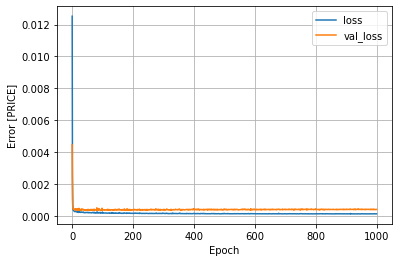

In [220]:
plot_loss(history)

In [173]:
test = xval_scale[50].reshape(1,157)
label = yval_scale[50].reshape(-1,1)

test_predictions = model.predict(test)
test_predictions = scaler_y.inverse_transform(test_predictions)
print("Prediction",test_predictions)

ValueError: cannot reshape array of size 259 into shape (1,157)

# Scatterplot show casting the model perfomance on the testSet

[]

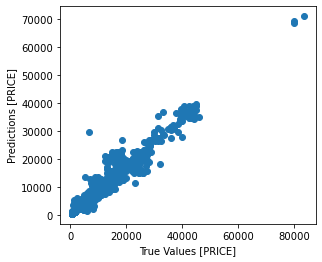

In [221]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, predictions)
plt.xlabel('True Values [PRICE]')
plt.ylabel('Predictions [PRICE]')
plt.plot()

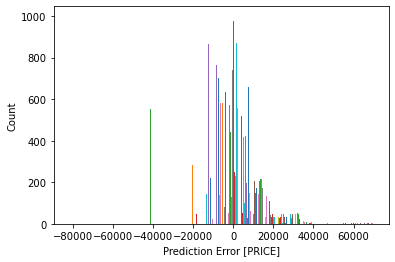

In [222]:
error = predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [PRICE]')
_ = plt.ylabel('Count')

In [224]:
model.save('price_prediction.h5')